

**LLR_MC1+Lösung(auto)_HS2021**

## Aufgabe 1a – Daten einlesen & Scatterplot

**(2 P)**
Lesen Sie die Datei `autos.csv` in Python ein und stellen Sie den **Bremsweg** abhängig von der **Geschwindigkeit** grafisch dar.

---

### Theorie (aus dem Vorlesungsskript)

Im Skript *„Lineare und logistische Regression“* (Kapitel 1: Lineare Modelle) wird die Beziehung zwischen einer erklärenden und einer Zielvariable als

$$
y_i = \alpha + \beta x_i + \varepsilon_i
$$

beschrieben.

**Bedeutung der Terme:**
- $y_i$: abhängige Variable → hier *Bremsweg* (`distanz`)
- $x_i$: unabhängige Variable → hier *Geschwindigkeit* (`geschwindigkeit`)
- $\alpha$: Achsenabschnitt – Bremsweg bei 0 km/h
- $\beta$: Steigung – Zunahme des Bremswegs pro km/h
- $\varepsilon_i$: Fehler – zufällige Abweichungen, erwartet $E[\varepsilon_i]=0$

Bevor man dieses lineare Modell schätzt, **prüft man visuell**, ob ein annähernd linearer Zusammenhang plausibel ist.
Der **Scatterplot** zeigt, ob:
- der Trend steigend ist (positiver $\beta$),
- die Punkte etwa auf einer Geraden liegen,
- eine Krümmung oder Trichterform auftritt → Hinweis auf Nichtlinearität oder Heteroskedastizität,
- Ausreisser vorhanden sind.

Physikalisch gilt: der Bremsweg wächst näherungsweise **quadratisch** mit der Geschwindigkeit

$$
s \propto v^2
$$

Ein leicht nach oben gekrümmter Trend ist also normal, aber das lineare Modell $y=\alpha+\beta x$ bleibt eine sinnvolle erste Annäherung.

---

### Lösungsansatz

Ziel: **so wenig Code wie möglich**, aber volle Aufgabenabdeckung.
Die Daten sind sauber, also kein NaN-Handling oder Spalten-Guessing nötig.

Verwendete Befehle:
- `pd.read_csv()` → lädt CSV-Datei in DataFrame
- `plt.scatter(x, y)` → erzeugt Streudiagramm

Damit ist die Aufgabe vollständig erfüllt.

In [1]:
#sklearn

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm



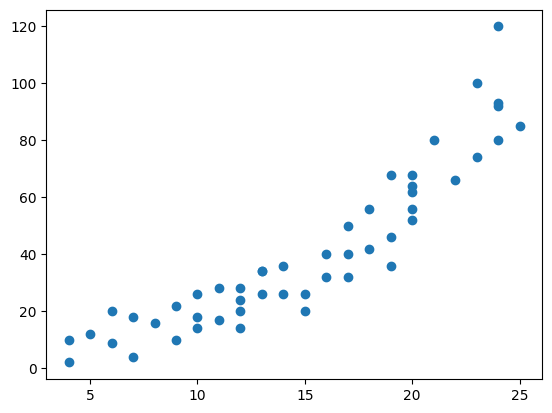

In [2]:
#sklearn

df = pd.read_csv('autos-1647012077(1).csv')
plt.scatter(df['geschwindigkeit'], df['distanz'])



---

### Erklärung des Outputs

Der Scatterplot zeigt:

- **positiven Trend:** Bremsweg steigt mit Geschwindigkeit
- **leichte Krümmung:** Zunahme wird bei höherer Geschwindigkeit stärker → Hinweis auf $s \propto v^2$
- **keine Ausreisser, konstante Streuung:** lineares Modell plausibel

**Kurzinterpretation (prüfungsnotizfähig):**
> „Scatterplot zeigt klar steigenden Trend mit leichter Krümmung → lineare Annäherung brauchbar, aber evtl. quadratischer Zusammenhang (Bremsenergie ∝ v²).“


---
---

## Aufgabe 1b – Lineare Regression (OLS): Gleichung angeben

**(2 P)**
Führen Sie eine **lineare Regression** durch, um ein Modell für den Bremsweg zu finden.
Geben Sie die gefundene **Gleichung** an.

---

### Theorie (aus dem Vorlesungsskript)

Wir modellieren den Zusammenhang zwischen Geschwindigkeit $x$ und Bremsweg $y$ durch die **lineare Einfachregression**:

$$
y_i = \alpha + \beta x_i + \varepsilon_i
$$

Die **Methode der kleinsten Quadrate (OLS)** bestimmt $\alpha,\beta$ so, dass die Summe der quadrierten Abweichungen minimiert wird:

$$
\min_{\alpha,\beta}\ \sum_{i=1}^{n} \big(y_i - (\alpha + \beta x_i)\big)^2
$$

Die geschätzten Koeffizienten lauten:

$$
\hat\beta = \frac{\sum_i (x_i-\bar x)(y_i-\bar y)}{\sum_i (x_i-\bar x)^2},
\qquad
\hat\alpha = \bar y - \hat\beta\,\bar x
$$

Die **Regressionsgerade** ist:

$$
\hat y = \hat\alpha + \hat\beta x
$$

**Interpretation:**
- $\hat\alpha$ (Intercept): geschätzter Bremsweg bei $x=0$ (physikalisch hier nicht zentral).
- $\hat\beta$ (Slope): **Zunahme** des Bremswegs pro km/h.

---

### Lösungsansatz (zwei Wege)

**A) sklearn (minimal & schnell)**
- `LinearRegression().fit(X, y)` mit `X = df[['geschwindigkeit']]`, `y = df['distanz']`.
- Zugriff auf $\hat\alpha$ via `model.intercept_`, auf $\hat\beta$ via `model.coef_[0]`.
- Gut für **kurzen Code** und 1b/1d.

**B) statsmodels (inferenzfreundlich)**
- `sm.OLS(y, sm.add_constant(X)).fit()`
- `model.params` enthält $\hat\alpha,\hat\beta$; `model.summary()` liefert zusätzlich $R^2$, $p$-Werte, Durbin–Watson, usw.
- Ideal, wenn du im Anschluss **Signifikanz/Diagnostik** (1f) brauchst.

In [3]:
#sklearn


m = LinearRegression().fit(df[['geschwindigkeit']], df['distanz'])
print(m.intercept_, m.coef_[0])


-22.91255308461573 4.2695556874743135


---

### Erklärung des Outputs

Beide Varianten (`sklearn` und `statsmodels`) berechnen die Parameter $\hat\alpha$ und $\hat\beta$ der linearen Gleichung

$$
\hat y = \hat\alpha + \hat\beta x
$$

**Interpretation der Ergebnisse:**

- $\hat\beta$ (Steigung) ist **positiv** → der Bremsweg steigt mit zunehmender Geschwindigkeit.
- $\hat\alpha$ (Achsenabschnitt) kann **negativ** sein – das ist kein Fehler, sondern eine Folge der linearen Extrapolation nahe $x=0$.
- Der numerische Wert von $\hat\beta$ zeigt, **um wie viele Meter der Bremsweg pro zusätzlichem km/h** im Mittel zunimmt.

**Kurznotiz (prüfungsreif):**
> „$\hat\beta > 0$ → positiver Zusammenhang. Bremsweg steigt pro km/h um $\hat\beta$ m; negatives $\hat\alpha$ ist modellbedingt und physikalisch irrelevant.“


---
---

## Aufgabe 1c – Daten + Regressionsgerade plotten

**(1 P)**
Erstellen Sie eine zweite Grafik, in der die **Regressionsgerade** zusammen mit den Daten dargestellt ist.

---

### Theorie (aus dem Vorlesungsskript)

Nach der Schätzung von $\hat\alpha$ und $\hat\beta$ lautet das lineare Modell

$$
\hat y = \hat\alpha + \hat\beta x
$$

Die graphische Darstellung zeigt zwei Elemente:

1. **Datenpunkte** $(x_i, y_i)$ → Streudiagramm (zeigt die empirische Beziehung)
2. **Regressionsgerade** → zeigt den durch OLS geschätzten linearen Trend

Im Skript („Lineare Regression – Beispiel Gehalt vs. Erfahrung“) wird genau dieses Prinzip illustriert:
„Die Gerade durch die Daten zeigt den bestmöglichen linearen Zusammenhang nach der Methode der kleinsten Quadrate.“

Mathematisch erzeugt man die geschätzten Werte $\hat y_i$ durch Einsetzen von $x_i$ in die Schätzgleichung:

$$
\hat y_i = \hat\alpha + \hat\beta x_i
$$

Die Gerade läuft durch den Schwerpunkt $(\bar x, \bar y)$ der Daten, weil OLS so konstruiert ist, dass die mittleren Residuen 0 sind.

---

### Lösungsansatz

- Nutze denselben Datensatz und das bereits angepasste Modell aus 1b.
- Erzeuge eine x-Spalte (`df['geschwindigkeit']`) und berechne die geschätzten $\hat y$.
- Zeichne die Punkte + Gerade in einer Grafik.
- Verwende `plt.plot()` für die Gerade und `plt.scatter()` für die Daten.

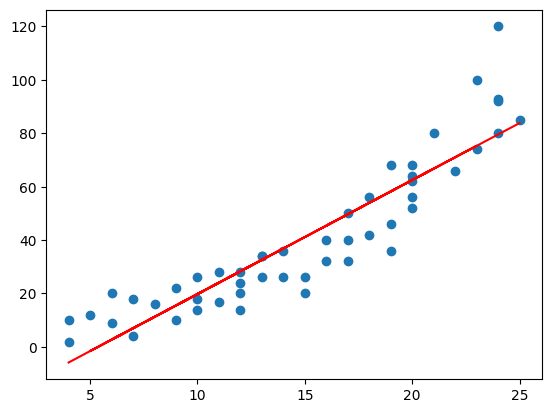

In [5]:
#sklearn


plt.scatter(df['geschwindigkeit'], df['distanz'])
plt.plot(df['geschwindigkeit'], m.predict(df[['geschwindigkeit']]), color='red')



---

### Erklärung des Outputs

Die Grafik zeigt die Datenpunkte und die bestangepasste Gerade:

- **Gerade steigt mit x:** $\hat\beta > 0$ → klarer positiver Trend.
- **Abweichungen verteilen sich zufällig um die Gerade:** keine systematischen Muster → lineares Modell passt grundlegend.
- **Leichte Krümmung möglich:** zeigt, dass die physikalische Beziehung eher quadratisch ist, aber lineares Modell für erste Analyse ausreichend.

**Kurznotiz (prüfungsreif):**
> „Regressionsgerade zeigt klar positiven Zusammenhang; Residuen gleichmässig verteilt → lineares Modell grundlegend plausibel.“


---
---
## Aufgabe 1d – R² berechnen & Modellqualität bewerten

**(2 P)**
Berechnen Sie $R^2$ und bewerten Sie die Qualität des Modells in Worten.

---

### Theorie (aus dem Vorlesungsskript)

Für die lineare Einfachregression $y_i = \alpha + \beta x_i + \varepsilon_i$
misst das **Bestimmtheitsmaß** $R^2$ den Anteil der durch das Modell erklärten Variation von $y$.

**Zerlegung der Quadratsummen:**

- Gesamtstreuung:
  $$
  \mathrm{SST} = \sum_{i=1}^n (y_i - \bar y)^2
  $$

- Residuenstreuung:
  $$
  \mathrm{SSE} = \sum_{i=1}^n (y_i - \hat y_i)^2
  $$

- Erklärte Streuung: $$\mathrm{SSR} = \mathrm{SST} - \mathrm{SSE}$$

**Bestimmtheitsmaß:**

$$
R^2 = 1 - \frac{\mathrm{SSE}}{\mathrm{SST}} = \frac{\mathrm{SSR}}{\mathrm{SST}}, \quad 0 \le R^2 \le 1
$$

**Interpretation:**

- $R^2 = 0.82$ → 82 % der Variation in $y$ werden durch das lineare Modell erklärt.
- Ein höheres $R^2$ bedeutet stärkere lineare Erklärbarkeit.
- Aber ein hohes $R^2$ garantiert nicht, dass die Modellannahmen (Linearität, Homoskedastizität, Normalität) erfüllt sind.

**Kontext Bremsweg ~ Geschwindigkeit:**
Da $s \propto v^2$ gilt, kann die lineare Annäherung etwas Erklärungsgrad verlieren; trotzdem ist ein hohes $R^2$ üblich, weil der Trend stark ist.

---

### Lösungsansatz

- **sklearn:** `m.score(X, y)` liefert direkt $R^2$.
- **statsmodels:** `r.rsquared` liefert ebenfalls $R^2$.
- **Manuell (optional):** über $1 - \mathrm{SSE}/\mathrm{SST}$ prüfen.

In [7]:
m.score(df[['geschwindigkeit']], df['distanz'])


0.8243250457863955


---

### Erklärung des Outputs

- $R^2$ nahe 1 → sehr gute lineare Erklärung.
- Mittelwert (0.6–0.8) → brauchbar, aber leichte Nichtlinearität möglich.
- Niedrig → lineares Modell ungeeignet oder Ausreisser vorhanden.

**Kurznotiz (prüfungsreif):**
> „$R^2 = …$ → Geschwindigkeit erklärt … % der Variation im Bremsweg. Trotz gutem $R^2$ werden Residuen in 1e/1f auf Linearität und Homoskedastizität geprüft.“
>
>


---
---


## Aufgabe 1e – Residuen berechnen & plotten

**(2 P)**
Berechnen und plotten Sie die **Residuen**.

---

### Theorie (aus dem Vorlesungsskript)

Die Residuen $r_i$ sind die Differenz zwischen den beobachteten und den vorhergesagten Werten:

$r_i = y_i - \hat y_i$

Sie messen, wie stark das Modell bei jeder Beobachtung danebenliegt.
Im Skript wird betont: *„Bei einem guten linearen Modell sollen die Residuen zufällig um 0 streuen, ohne systematische Muster.“*

**Ziele der grafischen Kontrolle:**

1. **Residuen vs. $\hat y$** – Überprüfung der Linearität
   - zufällige Streuung um 0 → ok
   - systematische Form (z. B. U-Form) → Modell nicht linear

2. **Residuen vs. $x$** – Prüfung auf Heteroskedastizität
   - konstante Streuung → ok
   - trichterförmige Streuung → Varianz abhängig von $x$
      - **Heteroskedastizitaet (Varianz nicht konstant):**
        Wir erwarten Residuen mit etwa konstanter Streuung um 0. Nimmt die Streuung mit $x$ oder $\hat y$ zu/ab (Trichterform), liegt Heteroskedastizitaet vor.




---

### Lösungsansatz

- Berechne $\hat y$ über das Modell (mit `predict()`).
- Berechne $r_i = y_i - \hat y_i$.
- Stelle drei Plots dar:
  - Residuen vs. $\hat y$
  - Residuen vs. $x$
  - Histogramm der Residuen

Diese Plots genügen, um visuell die Modellannahmen zu beurteilen.

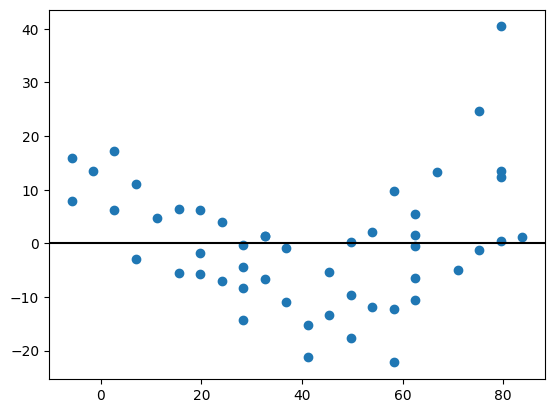

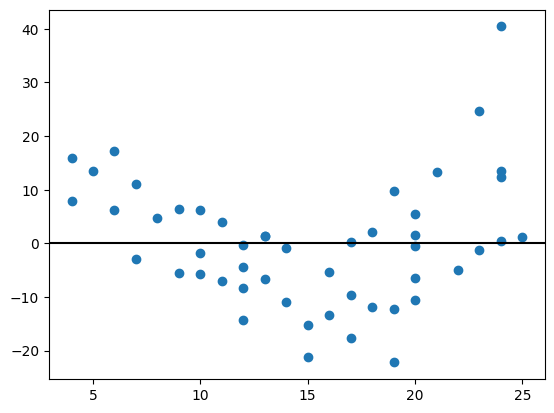

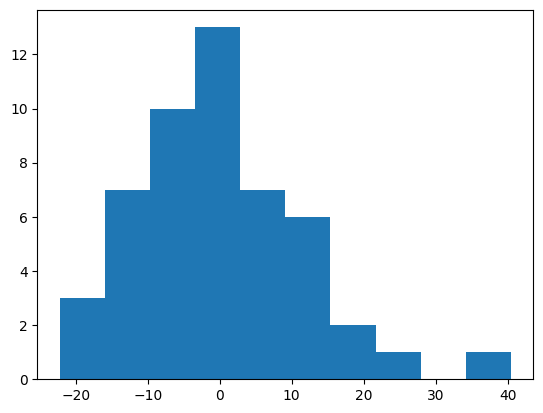

In [9]:
#sklearn

yhat = m.predict(df[['geschwindigkeit']])
resid = df['distanz'] - yhat


plt.scatter(yhat, resid); plt.axhline(0, color='black'); plt.show()
plt.scatter(df['geschwindigkeit'], resid); plt.axhline(0, color='black'); plt.show()
plt.hist(resid); plt.show()



---

### Erklärung des Outputs


- **U-förmiges Muster:** Beziehung eher quadratisch → Modell anpassen.
- **Deutlich U-foermiges Muster** in Residuen vs. $\hat y$ und vs. $x$: Das lineare Modell ist **missspezifiziert** (Zusammenhang nicht linear).
- **Konsequenz:** Ein **quadratischer Term** ($x^2$) oder eine **Transformation** der Zielvariable (z. B. $\sqrt{y}$ oder $\log y$) ist angebracht.
- **Trichterform:** Varianz nicht konstant → Heteroskedastizität. Die Streuung nimmt zu höheren $x$-Werten hin zu (Trichter-Tendenz)
- **Kurznotiz (pruefungsreif):**
  > „Residuen zeigen klare U-Form → Lineares Modell unzureichend. Naechster Schritt: $x^2$ hinzufuegen **oder** $y$ transformieren (z. B. $\sqrt{y}$). Ausserdem Anzeichen fuer Heteroskedastizitaet → nach Anpassung erneut Residuen pruefen.

    >Histogramm rechtsschief → Modell unterschätzt hohe Bremswege. Ursache: tatsächlicher Zusammenhang nicht linear (eher $v^2$). Normalverteilungsannahme verletzt; Empfehlung: quadratischer Term ($x^2$) oder Transformation von $y$ prüfen."

---
---


## Aufgabe 1f – Residuentest durchführen

**(3 P)**
Führen Sie einen **Residuentest** durch. Schreiben Sie sowohl die **Testkriterien** wie auch die **Resultate** auf.

---

### Theorie

Im Skript wird erklärt, dass die Qualität eines linearen Modells nicht nur über $R^2$,
sondern auch über die **Analyse der Residuen** beurteilt wird.

Die Residuen $r_i = y_i - \hat y_i$ zeigen die Differenz zwischen beobachteten und durch das Modell vorhergesagten Werten.
Sie sind entscheidend, um zu beurteilen, ob die Annahmen des linearen Modells erfüllt sind.

Ein korrekt spezifiziertes lineares Modell erfüllt folgende Bedingungen:

1. **Linearität**
   Der Zusammenhang zwischen $x$ und $y$ ist linear, also $E[y|x] = \alpha + \beta x$.
   → Im Residuenplot dürfen keine systematischen Strukturen wie eine U-Form erkennbar sein.

2. **Erwartungswert der Fehler**
   $E[\varepsilon] = 0$.
   → Die Residuen sollen gleichmässig um die Nulllinie streuen und im Mittel 0 ergeben.

3. **Homoskedastizität (Varianzkonstanz)**
   $\mathrm{Var}(\varepsilon_i)$ ist für alle Beobachtungen gleich.
   → Die Streuung der Residuen sollte über den gesamten Wertebereich von $x$ konstant bleiben.
   → Eine Trichterform deutet auf Heteroskedastizität hin (Varianz nimmt mit $x$ zu).

4. **Normalverteilte Residuen**
   Die Fehler sollen annähernd normalverteilt sein.
   → Das Histogramm der Residuen sollte symmetrisch und glockenförmig sein.
   → Eine Schiefe weist auf eine Verletzung der Normalverteilungsannahme hin.

5. **Unabhängigkeit der Fehler**
   Die Residuen sollen nicht miteinander korreliert sein.
   → Bei zufälliger Stichprobe ohne Zeitstruktur wird diese Annahme in der Regel als erfüllt betrachtet.

---

**Im Skript wird betont:**
> „Wenn das lineare Modell passt, sollen die Residuen zufällig um 0 verteilt sein und keine Struktur zeigen.“

**In der Prüfung genügt die visuelle Beurteilung** der drei Standardplots (siehe Aufgabe 1e):
- Residuen vs. $\hat y$
- Residuen vs. $x$
- Histogramm der Residuen

---

### Interpretation der Residuenplots (Ergebnisse des Tests)

- **Linearität:** Die Residuen zeigen eine deutliche **U-Form** → das Modell ist **nicht linear genug**.
  Verbesserung: $x^2$ hinzufügen oder $y$ transformieren (z. B. $\sqrt y$).
- **Homoskedastizität:** Die Streuung der Residuen nimmt mit $x$ zu (**Trichterform**) → Varianz nicht konstant.
- **Normalität:** Das Histogramm ist **rechtsschief** (linkssteil, Ausreisser rechts) → Fehler nicht normalverteilt; Modell unterschätzt hohe Bremswege.
- **Unabhängigkeit:** Keine auffälligen Muster → Annahme vermutlich erfüllt.

---

### Kurznotiz (prüfungsreif)

> „Residuen zeigen U-Form, Heteroskedastizität und Rechtsschiefe → Annahmen verletzt.
> Empfehlung: $x^2$-Term oder Transformation von $y$ einführen und Residuen erneut prüfen.“


---
---

## Aufgabe 1g – Beurteilung des Modells

**(2 P)**
Beurteilen Sie das **lineare Modell** aufgrund Ihrer Ergebnisse.
Interpretieren Sie die Regressionskoeffizienten und die Modellgüte inhaltlich und statistisch.

---

### Theorie

Im Skript wird betont, dass ein lineares Regressionsmodell nur dann sinnvoll ist,
wenn es sowohl **statistisch plausibel** als auch **inhaltlich interpretierbar** ist.

Die Beurteilung stützt sich auf zwei Ebenen:

1. **Statistische Bewertung**
   - **Steigungskoeffizient $\hat\beta$:** beschreibt, wie stark $y$ (hier der Bremsweg) im Mittel steigt,
     wenn $x$ (die Geschwindigkeit) um eine Einheit zunimmt.
     $\hat\beta>0$ bestätigt den erwarteten positiven Zusammenhang.
   - **Achsenabschnitt $\hat\alpha$:** gibt den theoretischen Bremsweg bei $x=0$ an;
     inhaltlich meist ohne Bedeutung, da das Modell dort nicht gültig ist.
   - **Bestimmtheitsmass $R^2$:** misst, welcher Anteil der Variation in $y$
     durch die lineare Beziehung mit $x$ erklärt wird.
     Werte nahe 1 zeigen eine gute Erklärung, Werte unter 0.5 eine schwache Anpassung.

2. **Diagnostische Bewertung (Residuenanalyse)**
   - **Linearität:** keine systematische Struktur im Residuenplot.
   - **Homoskedastizität:** konstante Varianz der Residuen.
   - **Normalität:** annähernd symmetrische Residuenverteilung.
   - **Unabhängigkeit:** Residuen ohne Muster oder Abhängigkeiten.

Nur wenn diese Annahmen erfüllt sind, gelten die Schätzungen als unverzerrt und die Tests als verlässlich.

---

### Lösungsansatz & Erklärung

- Ziehen Sie die Ergebnisse aus den vorherigen Aufgaben zusammen:
  - Aus 1b: $\hat\alpha$, $\hat\beta$
  - Aus 1d: $R^2$
  - Aus 1e–1f: Residuenverhalten
- Bewerten Sie damit die **Güte und Angemessenheit** des Modells.
- Beurteilen Sie, ob eine Erweiterung (z. B. quadratischer Term $x^2$) angebracht ist.
- Geben Sie an, ob das Modell trotz Abweichungen praktisch brauchbar bleibt.

---

### Interpretation

- **Statistisch:**
  Das Modell zeigt einen deutlichen positiven Zusammenhang zwischen Geschwindigkeit und Bremsweg ($\hat\beta>0$).
  Der relativ hohe $R^2$ Wert bestätigt, dass ein grosser Teil der Variation in $y$ durch $x$ erklärt wird.

- **Diagnostisch:**
  Die Residuen weisen jedoch eine klare U-Form und zunehmende Streuung mit $x$ auf.
  Das deutet auf Nichtlinearität und Heteroskedastizität hin.
  Das Histogramm der Residuen ist rechtsschief (linkssteil mit Ausreissern rechts),
  was eine Abweichung von der Normalverteilung signalisiert.

- **Inhaltlich:**
  Der positive Zusammenhang entspricht der physikalischen Erwartung,
  dass der Bremsweg mit zunehmender Geschwindigkeit ansteigt.
  Die U-Form erklärt sich dadurch, dass der reale Zusammenhang eher quadratisch ($s\propto v^2$) ist.

- **Gesamtbewertung:**
  Das Modell ist für eine erste lineare Näherung brauchbar,
  aber keine ausreichende Beschreibung des tatsächlichen Zusammenhangs.
  Eine Erweiterung durch einen $x^2$-Term oder eine Transformation von $y$ (z. B. $\sqrt y$) wäre angemessen.

---

### Kurznotiz (prüfungsreif)

> „$\hat\beta>0$ → Bremsweg steigt mit Geschwindigkeit.
> $R^2$ hoch → gute Grundanpassung.
> Residuen zeigen U-Form und Rechtsschiefe → lineares Modell verletzt Annahmen.
> Empfehlung: quadratisches Modell oder Transformation von $y$ testen.“
